# Import

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import sweetviz as sv
import plotly.graph_objects as go

# Data Cleaning

In [2]:
dete = pd.read_csv(r"C:\Users\Administrator\Downloads\employ_exit_survey\dete-exit-survey-january-2014.csv", na_values="Not Stated")

In [3]:
dete_update = dete.copy()
dete_update = dete_update.drop(columns=dete_update.iloc[:,28:49], axis=1)

In [4]:
def clean(col):
    clean = col.str.rstrip().str.replace('-', '').str.replace('Contributing Factors. ', '').str.replace(' ', '_').str.replace('career_', '').str.lower()
    return clean
dete_update.columns = clean(dete_update.columns)
rename_cols = {'separationtype':'ceasing_type', 'ill_health':'medical_insurance', 'record_id':'id',
              'cessation_year': 'cease_date', 'reason_for_ceasing_employment': 'ceasing_type',
              'gender._\xa0\xa0\xa0\xa0what_is_your_gender?': 'gender', 'currentage._\xa0\xa0\xa0\xa0current_age': 'age',
              'employment_type._\xa0\xa0\xa0\xa0employment_type': 'employment_status',
              'classification._\xa0\xa0\xa0\xa0classification': 'position',
              'lengthofserviceoverall._overall_length_of_service_at_institute_(in_years)': 'institute_service',
              'lengthofservicecurrent._length_of_service_at_current_workplace_(in_years)': 'role_service'}
dete_update.rename(columns=rename_cols, inplace=True)
dete_update.loc[:,"cease_date"] = pd.to_datetime(dete_update.loc[0:,"cease_date"])
dete_update.loc[:,"dete_start_date"] = pd.to_datetime(dete_update.loc[0:,"dete_start_date"], format="%Y")
dete_update.loc[:,"role_start_date"] = pd.to_datetime(dete_update.loc[0:,"role_start_date"], format="%Y", errors='coerce')
dete_update["cease_year"] = pd.to_datetime(dete_update.loc[0:,"cease_date"].dt.strftime("%Y"))
dete_update.iloc[:,30:35] = dete_update[dete_update.columns[30:35].tolist()].applymap(lambda x: "No" if pd.isnull(x) else "Yes")

In [18]:
dete_update.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 36 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   id                                   822 non-null    int64         
 1   ceasing_type                         822 non-null    object        
 2   cease_date                           788 non-null    datetime64[ns]
 3   dete_start_date                      749 non-null    datetime64[ns]
 4   role_start_date                      723 non-null    datetime64[ns]
 5   position                             817 non-null    object        
 6   classification                       455 non-null    object        
 7   region                               717 non-null    object        
 8   business_unit                        126 non-null    object        
 9   employment_status                    817 non-null    object        
 10  career_move_to

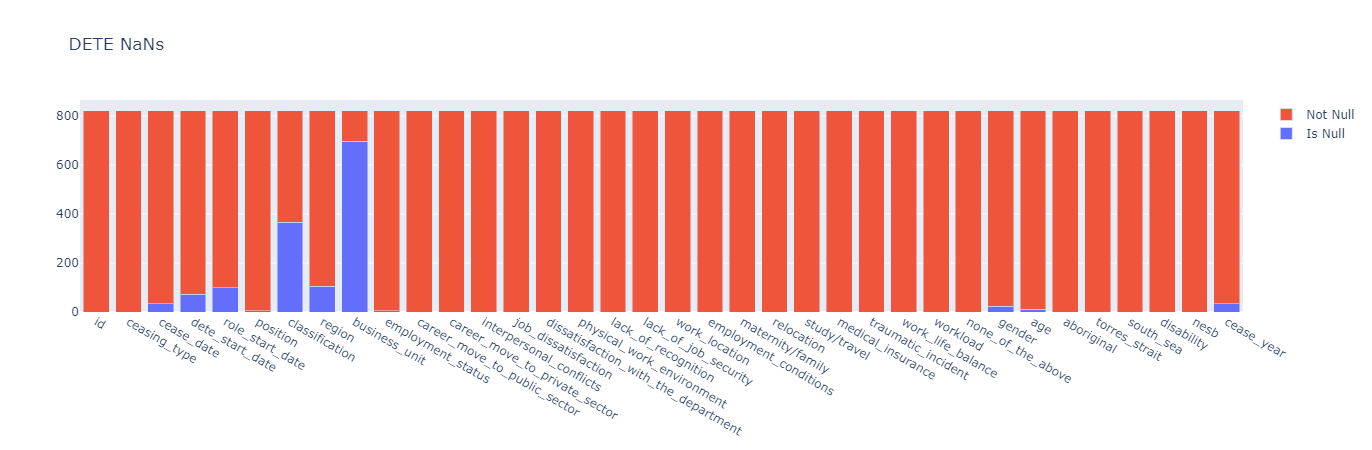

In [11]:
def find_nans(df, chart_title):
    """
    This function displays the NaNs valus vs Not NaNs in a stack bar chart.
    Parameters: * df: the main dataframe (pandas.DataFrame)
                * chart_title: title (str)
    """
    isnull = df.isnull().sum().reset_index()
    notnull = df.notnull().sum().reset_index()
    data = [go.Bar(x=isnull['index'].astype(str).tolist(),
                  y=isnull[0].tolist(), name='Is Null'),
           go.Bar(x=notnull['index'].astype(str).tolist(),
                 y=notnull[0].tolist(), name='Not Null')]
    layout = go.Layout({'title':chart_title, 'barmode':'stack'})
    fig = go.Figure(data, layout)
    return fig.show()
find_nans(dete_update, 'DETE NaNs')

# Data Analysis

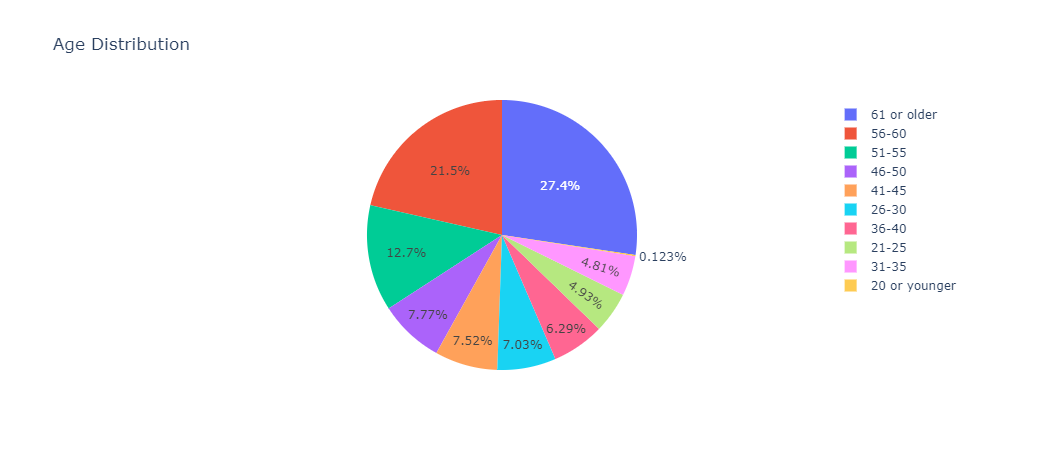

In [6]:
age_count = dete_update.age.value_counts().reset_index()
data = go.Pie(labels=age_count['index'].tolist(), values=age_count['age'].tolist())
layout= go.Layout(title="Age Distribution")
fig= go.Figure(data=data, layout=layout)
fig.show()

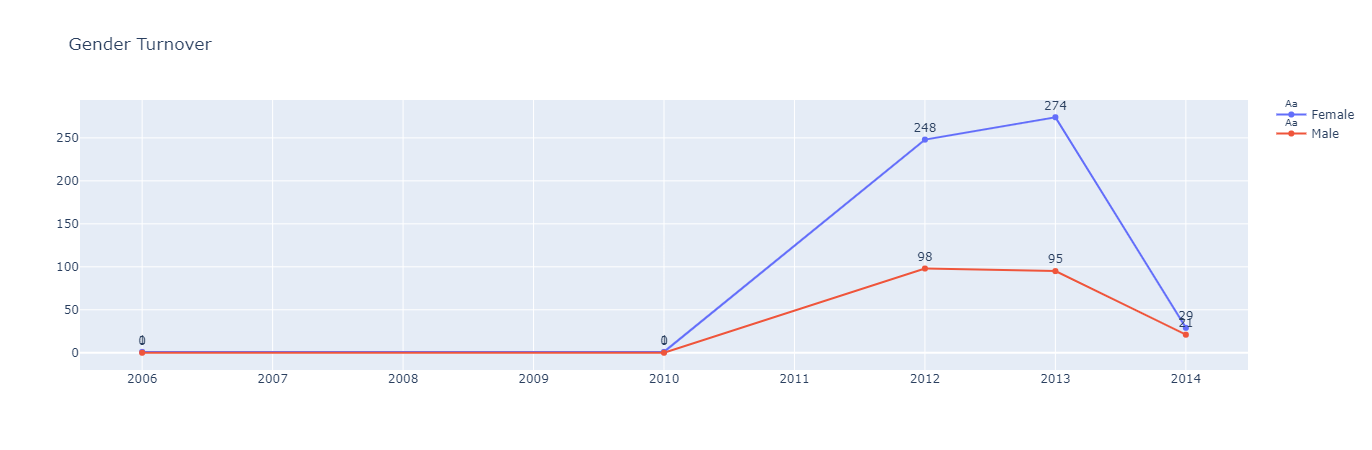

In [16]:
per = dete_update['cease_date'].dt.to_period('y')
gender_turnover = pd.crosstab(per, dete_update['gender']).reset_index()
data = []
for col in gender_turnover.columns:
    if col != 'cease_date':
        data.append(go.Scatter(name=col,
                               x=gender_turnover['cease_date'].astype(str).tolist(),
                               y=gender_turnover[col].tolist(),
                               text=gender_turnover[col].astype(str).tolist(),
                               textposition='top center',
                               mode='lines+markers+text'))
layout = go.Layout(title="Gender Turnover")
fig= go.Figure(data=data, layout=layout)
fig.show()